In [1]:
import pandas as pd


clients = pd.read_csv("datos/caso_1/clients.csv")
depots = pd.read_csv("datos/caso_1/depots.csv")
depots = depots.drop(columns=["DepotID"])
vehicles = pd.read_csv("datos/caso_1/vehicles.csv")


print(clients.head())
print(depots.head())
print(vehicles.head())


   ClientID  LocationID  Demand  Longitude  Latitude
0         1           2      13 -74.098938  4.597954
1         2           3      15 -74.075571  4.687821
2         3           4      12 -74.107085  4.709494
3         4           5      15 -74.097280  4.605029
4         5           6      20 -74.164641  4.648464
   LocationID  Longitude  Latitude
0           1 -74.153536  4.743359
   VehicleID  Capacity  Range
0          1       130    170
1          2       140    200
2          3       120    180
3          4       100     90
4          5        70    100


In [2]:

depots = depots.rename(columns={"LocationID": "id"})
clients = clients.rename(columns={"LocationID": "id"})
depots["id"] = 0 
depots["Demand"] = 0


clients = clients.reset_index(drop=True)
clients["id"] = clients.index + 1  

depots = depots[["id", "Longitude", "Latitude", "Demand"]]
clients = clients[["id", "Longitude", "Latitude", "Demand"]]

nodes = pd.concat([depots, clients], ignore_index=True)

lat_lon_list = [tuple(coord) for coord in nodes[["Latitude", "Longitude"]].values.tolist()] # lista de tuplas con latitudes y longitudes ordenadas por id
lon_lat_list = [(lon, lat) for lat, lon in lat_lon_list] # lista de tuplas con longitudes y latitudes ordenadas por id

N = nodes["id"].tolist()

C = clients["id"].tolist()

De = nodes.set_index("id")["Demand"].to_dict()

depot = 0

V = vehicles["VehicleID"].tolist()
P = vehicles.set_index("VehicleID")["Capacity"].to_dict()
M = vehicles.set_index("VehicleID")["Range"].to_dict()

print("Nodos:", N)
print("Clientes:", C)
print("Vehículos:", V)
print("Capacidades:", P)
print("Alcances:", M)
print("Demanda:", De)



Nodos: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Clientes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
Vehículos: [1, 2, 3, 4, 5, 6, 7, 8]
Capacidades: {1: 130, 2: 140, 3: 120, 4: 100, 5: 70, 6: 55, 7: 110, 8: 114}
Alcances: {1: 170, 2: 200, 3: 180, 4: 90, 5: 100, 6: 170, 7: 150, 8: 140}
Demanda: {0: 0, 1: 13, 2: 15, 3: 12, 4: 15, 5: 20, 6: 17, 7: 17, 8: 20, 9: 20, 10: 15, 11: 17, 12: 12, 13: 21, 14: 15, 15: 17, 16: 10, 17: 25, 18: 12, 19: 11, 20: 15, 21: 14, 22: 18, 23: 15, 24: 11}


In [3]:
import openrouteservice
from openrouteservice import convert
import time  

def get_distancia_y_tiempo(api_key, start_coords, end_coords):
    client = openrouteservice.Client(key=api_key)

    try:
        route = client.directions(
            coordinates=[start_coords, end_coords],
            profile='driving-car',
            format='geojson'
        )

        distance_m = route['features'][0]['properties']['segments'][0]['distance']
        duration_s = route['features'][0]['properties']['segments'][0]['duration']

        distance_km = distance_m / 1000
        duration_min = duration_s / 60

        return distance_km, duration_min
    except Exception as e:
        print(f"Error con ruta {start_coords} -> {end_coords}: {e}")
        return float('inf'), float('inf')  

# Clave API
api_key = '5b3ce3597851110001cf62487e04df114afa4c3ab39b2f9422fc450a'

In [4]:
distances = {(0, 0): 0.0, (0, 1): 27.1938, (0, 2): 16.9897, (0, 3): 12.367, (0, 4): 26.7042, (0, 5): 22.637400000000003, (0, 6): 19.6539, (0, 7): 25.0218, (0, 8): 23.8935, (0, 9): 30.672900000000002, (0, 10): 33.8628, (0, 11): 33.4883, (0, 12): 15.8655, (0, 13): 21.6602, (0, 14): 10.360899999999999, (0, 15): 26.7918, (0, 16): 33.9123, (0, 17): 26.608, (0, 18): 19.8704, (0, 19): 20.932599999999997, (0, 20): 13.1411, (0, 21): 27.835099999999997, (0, 22): 24.4072, (0, 23): 11.3399, (0, 24): 30.865299999999998, (1, 0): 30.9567, (1, 1): 0.0, (1, 2): 14.286299999999999, (1, 3): 19.4419, (1, 4): 1.1334000000000002, (1, 5): 12.4978, (1, 6): 11.316799999999999, (1, 7): 17.807599999999997, (1, 8): 13.7538, (1, 9): 7.5148, (1, 10): 7.3902, (1, 11): 10.330200000000001, (1, 12): 25.8113, (1, 13): 8.2964, (1, 14): 20.3067, (1, 15): 1.2928, (1, 16): 7.4397, (1, 17): 4.4865, (1, 18): 9.8418, (1, 19): 14.974200000000002, (1, 20): 23.0869, (1, 21): 21.675900000000002, (1, 22): 5.3789, (1, 23): 21.2856, (1, 24): 4.892600000000001, (2, 0): 18.3399, (2, 1): 12.6938, (2, 2): 0.0, (2, 3): 6.8251, (2, 4): 12.2043, (2, 5): 14.2971, (2, 6): 7.4335, (2, 7): 9.2244, (2, 8): 15.5531, (2, 9): 15.4566, (2, 10): 19.3629, (2, 11): 18.271900000000002, (2, 12): 13.1945, (2, 13): 6.443899999999999, (2, 14): 7.6899, (2, 15): 12.291799999999999, (2, 16): 19.4123, (2, 17): 11.3917, (2, 18): 8.776200000000001, (2, 19): 5.5986, (2, 20): 10.4701, (2, 21): 12.8047, (2, 22): 9.9073, (2, 23): 8.6688, (2, 24): 15.8058, (3, 0): 13.7618, (3, 1): 15.9735, (3, 2): 5.769399999999999, (3, 3): 0.0, (3, 4): 15.4839, (3, 5): 11.4171, (3, 6): 8.4336, (3, 7): 13.8014, (3, 8): 12.6731, (3, 9): 19.452599999999997, (3, 10): 22.6425, (3, 11): 22.2679, (3, 12): 8.6164, (3, 13): 10.4399, (3, 14): 3.1118, (3, 15): 15.571399999999999, (3, 16): 22.692, (3, 17): 15.3877, (3, 18): 8.6501, (3, 19): 9.712299999999999, (3, 20): 5.892, (3, 21): 16.6148, (3, 22): 13.1869, (3, 23): 4.0908, (3, 24): 19.6449, (4, 0): 29.9455, (4, 1): 1.0477, (4, 2): 13.2751, (4, 3): 18.4307, (4, 4): 0.0, (4, 5): 11.486600000000001, (4, 6): 10.3056, (4, 7): 16.8071, (4, 8): 12.7426, (4, 9): 7.896, (4, 10): 8.3161, (4, 11): 10.7113, (4, 12): 24.800099999999997, (4, 13): 7.2852, (4, 14): 19.2955, (4, 15): 1.245, (4, 16): 8.3656, (4, 17): 4.168, (4, 18): 8.8306, (4, 19): 13.973700000000001, (4, 20): 22.075599999999998, (4, 21): 20.6753, (4, 22): 4.3783, (4, 23): 20.2744, (4, 24): 5.2737, (5, 0): 21.068900000000003, (5, 1): 13.4022, (5, 2): 16.2456, (5, 3): 17.528299999999998, (5, 4): 12.912700000000001, (5, 5): 0.0, (5, 6): 6.9555, (5, 7): 22.647599999999997, (5, 8): 1.5438, (5, 9): 7.168699999999999, (5, 10): 20.0575, (5, 11): 9.5595, (5, 12): 22.374200000000002, (5, 13): 13.326, (5, 14): 18.393099999999997, (5, 15): 13.000200000000001, (5, 16): 16.5134, (5, 17): 10.3829, (5, 18): 6.7284, (5, 19): 18.558400000000002, (5, 20): 21.173299999999998, (5, 21): 25.460900000000002, (5, 22): 12.8251, (5, 23): 19.3721, (5, 24): 14.797, (6, 0): 23.083299999999998, (6, 1): 10.2566, (6, 2): 9.1372, (6, 3): 11.5684, (6, 4): 9.767, (6, 5): 7.1674, (6, 6): 0.0, (6, 7): 16.6877, (6, 8): 8.4235, (6, 9): 9.4363, (6, 10): 16.911900000000003, (6, 11): 14.719700000000001, (6, 12): 16.4144, (6, 13): 6.2705, (6, 14): 12.4333, (6, 15): 9.8545, (6, 16): 16.961299999999998, (6, 17): 7.8393999999999995, (6, 18): 2.2229, (6, 19): 12.5985, (6, 20): 15.2134, (6, 21): 19.501, (6, 22): 9.6794, (6, 23): 13.4122, (6, 24): 12.2535, (7, 0): 27.2082, (7, 1): 18.2635, (7, 2): 8.9257, (7, 3): 12.429200000000002, (7, 4): 17.7739, (7, 5): 24.8929, (7, 6): 17.397299999999998, (7, 7): 0.0, (7, 8): 26.1489, (7, 9): 24.5572, (7, 10): 24.9325, (7, 11): 27.3726, (7, 12): 13.5238, (7, 13): 14.983, (7, 14): 16.5582, (7, 15): 17.8615, (7, 16): 24.982, (7, 17): 23.0826, (7, 18): 18.74, (7, 19): 4.943899999999999, (7, 20): 15.399799999999999, (7, 21): 6.7358, (7, 22): 15.476899999999999, (7, 23): 17.5371, (7, 24): 21.935, (8, 0): 22.3209, (8, 1): 13.6419, (8, 2): 17.7149, (8, 3): 18.7803, (8, 4): 13.152299999999999, (8, 5): 1.5442, (8, 6): 8.2075, (8, 7): 23.8996, (8, 8): 0.0, (8, 9): 7.5898, (8, 10): 20.3109, (8, 11): 9.9806, (8, 12): 23.6263, (8, 13): 14.2851, (8, 14): 19.6452, (8, 15): 13.239799999999999, (8, 16): 16.9346, (8, 17): 10.804, (8, 18): 7.9803999999999995, (8, 19): 19.8104, (8, 20): 22.4253, (8, 21): 26.7129, (8, 22): 13.7843, (8, 23): 20.6241, (8, 24): 15.218200000000001, (9, 0): 30.704099999999997, (9, 1): 9.640600000000001, (9, 2): 16.319399999999998, (9, 3): 19.1892, (9, 4): 9.72, (9, 5): 6.9096, (9, 6): 11.2624, (9, 7): 24.3085, (9, 8): 7.1342, (9, 9): 0.0, (9, 10): 13.7905, (9, 11): 5.8294, (9, 12): 24.0352, (9, 13): 12.8896, (9, 14): 20.0541, (9, 15): 10.461799999999998, (9, 16): 11.7565, (9, 17): 6.1304, (9, 18): 9.9685, (9, 19): 20.2193, (9, 20): 22.8342, (9, 21): 27.1218, (9, 22): 12.3887, (9, 23): 21.033, (9, 24): 7.6884, (10, 0): 37.2855, (10, 1): 6.9634, (10, 2): 20.615099999999998, (10, 3): 25.7707, (10, 4): 7.9477, (10, 5): 18.8266, (10, 6): 17.645599999999998, (10, 7): 20.8209, (10, 8): 20.0826, (10, 9): 11.6121, (10, 10): 0.0, (10, 11): 14.4275, (10, 12): 32.1401, (10, 13): 13.2966, (10, 14): 26.6355, (10, 15): 7.3355, (10, 16): 4.0966000000000005, (10, 17): 8.9414, (10, 18): 16.1706, (10, 19): 21.2243, (10, 20): 29.415599999999998, (10, 21): 27.925900000000002, (10, 22): 11.1304, (10, 23): 27.6144, (10, 24): 8.0281, (11, 0): 34.2926, (11, 1): 10.3111, (11, 2): 18.8741, (11, 3): 22.7778, (11, 4): 10.390600000000001, (11, 5): 9.2419, (11, 6): 14.8509, (11, 7): 27.897, (11, 8): 9.4666, (11, 9): 5.2534, (11, 10): 14.461, (11, 11): 0.0, (11, 12): 27.6237, (11, 13): 16.478099999999998, (11, 14): 23.642599999999998, (11, 15): 11.1324, (11, 16): 11.5955, (11, 17): 8.8295, (11, 18): 13.557, (11, 19): 23.8078, (11, 20): 26.4227, (11, 21): 30.7103, (11, 22): 15.9773, (11, 23): 24.6215, (11, 24): 8.3589, (12, 0): 16.021, (12, 1): 22.4444, (12, 2): 10.2331, (12, 3): 7.3769, (12, 4): 21.9548, (12, 5): 17.6028, (12, 6): 15.1221, (12, 7): 14.0479, (12, 8): 18.8588, (12, 9): 23.6792, (12, 10): 29.113400000000002, (12, 11): 28.738799999999998, (12, 12): 0.0, (12, 13): 16.9108, (12, 14): 7.3087, (12, 15): 22.0423, (12, 16): 29.1628, (12, 17): 21.8586, (12, 18): 14.835799999999999, (12, 19): 9.9587, (12, 20): 3.162, (12, 21): 10.473, (12, 22): 19.657799999999998, (12, 23): 8.287600000000001, (12, 24): 26.1158, (13, 0): 24.14, (13, 1): 8.405100000000001, (13, 2): 7.469600000000001, (13, 3): 12.625200000000001, (13, 4): 7.9155, (13, 5): 11.6519, (13, 6): 5.287, (13, 7): 16.2639, (13, 8): 12.9079, (13, 9): 13.0501, (13, 10): 15.0604, (13, 11): 15.492, (13, 12): 18.9946, (13, 13): 0.0, (13, 14): 13.49, (13, 15): 8.003, (13, 16): 15.1098, (13, 17): 8.6117, (13, 18): 8.0404, (13, 19): 13.4305, (13, 20): 16.2702, (13, 21): 20.132099999999998, (13, 22): 5.5661000000000005, (13, 23): 14.4689, (13, 24): 12.114600000000001, (14, 0): 11.2101, (14, 1): 19.2175, (14, 2): 9.013399999999999, (14, 3): 4.3615, (14, 4): 18.7279, (14, 5): 14.661100000000001, (14, 6): 11.6776, (14, 7): 17.0455, (14, 8): 15.917200000000001, (14, 9): 22.6966, (14, 10): 25.8865, (14, 11): 25.512, (14, 12): 6.0647, (14, 13): 13.6839, (14, 14): 0.0, (14, 15): 18.8154, (14, 16): 25.936, (14, 17): 18.631700000000002, (14, 18): 11.8941, (14, 19): 12.956299999999999, (14, 20): 3.3403, (14, 21): 19.8588, (14, 22): 16.4309, (14, 23): 1.2812000000000001, (14, 24): 22.889, (15, 0): 30.0619, (15, 1): 1.2137, (15, 2): 13.3915, (15, 3): 18.547099999999997, (15, 4): 0.7241000000000001, (15, 5): 11.603, (15, 6): 10.422, (15, 7): 16.9235, (15, 8): 12.859, (15, 9): 8.452, (15, 10): 7.8827, (15, 11): 11.2674, (15, 12): 24.9165, (15, 13): 7.4016, (15, 14): 19.411900000000003, (15, 15): 0.0, (15, 16): 7.9322, (15, 17): 4.6103000000000005, (15, 18): 8.947, (15, 19): 14.0901, (15, 20): 22.1921, (15, 21): 20.791700000000002, (15, 22): 4.4947, (15, 23): 20.3908, (15, 24): 5.8298000000000005, (16, 0): 37.461, (16, 1): 7.139, (16, 2): 20.790599999999998, (16, 3): 25.9462, (16, 4): 8.1232, (16, 5): 15.9357, (16, 6): 17.821099999999998, (16, 7): 20.9964, (16, 8): 17.1918, (16, 9): 9.8978, (16, 10): 4.4387, (16, 11): 10.7041, (16, 12): 32.315599999999996, (16, 13): 13.472100000000001, (16, 14): 26.811, (16, 15): 7.511, (16, 16): 0.0, (16, 17): 9.184, (16, 18): 16.3461, (16, 19): 21.3998, (16, 20): 29.5912, (16, 21): 28.1015, (16, 22): 11.3059, (16, 23): 27.789900000000003, (16, 24): 4.4685, (17, 0): 27.4455, (17, 1): 4.2753000000000005, (17, 2): 10.7751, (17, 3): 15.9307, (17, 4): 3.988, (17, 5): 7.6177, (17, 6): 7.8371, (17, 7): 19.5694, (17, 8): 8.873700000000001, (17, 9): 6.7292, (17, 10): 9.4461, (17, 11): 9.5446, (17, 12): 22.300099999999997, (17, 13): 7.7413, (17, 14): 16.7955, (17, 15): 5.0331, (17, 16): 9.644200000000001, (17, 17): 0.0, (17, 18): 7.0507, (17, 19): 16.736, (17, 20): 19.5757, (17, 21): 23.4376, (17, 22): 7.240399999999999, (17, 23): 17.7744, (17, 24): 5.0202, (18, 0): 18.401, (18, 1): 10.358, (18, 2): 13.2014, (18, 3): 11.7435, (18, 4): 9.8685, (18, 5): 7.2688999999999995, (18, 6): 3.8508, (18, 7): 19.978900000000003, (18, 8): 8.525, (18, 9): 9.537600000000001, (18, 10): 17.0134, (18, 11): 14.821200000000001, (18, 12): 18.1129, (18, 13): 10.281799999999999, (18, 14): 12.6083, (18, 15): 9.956, (18, 16): 17.0628, (18, 17): 7.9409, (18, 18): 0.0, (18, 19): 15.889700000000001, (18, 20): 15.3885, (18, 21): 22.7922, (18, 22): 9.780899999999999, (18, 23): 13.587200000000001, (18, 24): 12.355, (19, 0): 22.1658, (19, 1): 14.9999, (19, 2): 4.9091000000000005, (19, 3): 7.4853000000000005, (19, 4): 14.510399999999999, (19, 5): 19.1487, (19, 6): 11.7382, (19, 7): 5.9441999999999995, (19, 8): 20.404700000000002, (19, 9): 21.293599999999998, (19, 10): 21.669, (19, 11): 24.109, (19, 12): 9.4628, (19, 13): 11.2955, (19, 14): 11.515799999999999, (19, 15): 14.5979, (19, 16): 21.718400000000003, (19, 17): 16.2434, (19, 18): 13.0809, (19, 19): 0.0, (19, 20): 11.338799999999999, (19, 21): 7.7027, (19, 22): 12.2134, (19, 23): 12.4947, (19, 24): 18.671400000000002, (20, 0): 13.0801, (20, 1): 21.219099999999997, (20, 2): 11.015, (20, 3): 6.363, (20, 4): 20.7295, (20, 5): 16.6627, (20, 6): 13.679200000000002, (20, 7): 19.047, (20, 8): 17.9187, (20, 9): 24.6982, (20, 10): 27.888099999999998, (20, 11): 27.5135, (20, 12): 3.6336, (20, 13): 15.6855, (20, 14): 4.3678, (20, 15): 20.817, (20, 16): 27.9376, (20, 17): 20.6333, (20, 18): 13.895700000000001, (20, 19): 14.9579, (20, 20): 0.0, (20, 21): 14.4152, (20, 22): 18.4325, (20, 23): 5.3468, (20, 24): 24.8905, (21, 0): 29.4198, (21, 1): 22.3377, (21, 2): 14.1459, (21, 3): 17.9049, (21, 4): 21.8481, (21, 5): 25.279400000000003, (21, 6): 18.9922, (21, 7): 7.4017, (21, 8): 26.5355, (21, 9): 27.5493, (21, 10): 29.006700000000002, (21, 11): 33.6499, (21, 12): 10.4651, (21, 13): 20.735, (21, 14): 18.7698, (21, 15): 21.935599999999997, (21, 16): 29.0562, (21, 17): 26.7697, (21, 18): 20.3349, (21, 19): 7.5533, (21, 20): 13.480799999999999, (21, 21): 0.0, (21, 22): 19.551099999999998, (21, 23): 19.7487, (21, 24): 26.0091, (22, 0): 27.2434, (22, 1): 4.5848, (22, 2): 10.7864, (22, 3): 15.7285, (22, 4): 4.0952, (22, 5): 10.2545, (22, 6): 9.0735, (22, 7): 15.047600000000001, (22, 8): 11.5106, (22, 9): 11.6528, (22, 10): 11.2401, (22, 11): 13.7319, (22, 12): 20.5745, (22, 13): 4.2639, (22, 14): 16.593400000000003, (22, 15): 4.1828, (22, 16): 11.2896, (22, 17): 8.4443, (22, 18): 7.5985, (22, 19): 12.2142, (22, 20): 19.3735, (22, 21): 18.9159, (22, 22): 0.0, (22, 23): 17.5723, (22, 24): 8.2943, (23, 0): 12.2356, (23, 1): 19.267599999999998, (23, 2): 9.0635, (23, 3): 3.7392, (23, 4): 18.778, (23, 5): 14.711200000000002, (23, 6): 11.7277, (23, 7): 17.0955, (23, 8): 15.9672, (23, 9): 22.7467, (23, 10): 25.9366, (23, 11): 25.562, (23, 12): 7.090199999999999, (23, 13): 13.734, (23, 14): 1.0483, (23, 15): 18.8655, (23, 16): 25.986099999999997, (23, 17): 18.6818, (23, 18): 11.9442, (23, 19): 13.0064, (23, 20): 4.3658, (23, 21): 19.908900000000003, (23, 22): 16.481, (23, 23): 0.0, (23, 24): 22.939, (24, 0): 33.6136, (24, 1): 5.485399999999999, (24, 2): 16.8723, (24, 3): 22.0988, (24, 4): 5.5649, (24, 5): 12.3163, (24, 6): 14.171899999999999, (24, 7): 21.8581, (24, 8): 13.572299999999998, (24, 9): 6.2783999999999995, (24, 10): 6.5095, (24, 11): 9.0938, (24, 12): 26.9447, (24, 13): 12.3468, (24, 14): 22.9636, (24, 15): 6.3067, (24, 16): 3.991, (24, 17): 6.8277, (24, 18): 12.878, (24, 19): 19.0247, (24, 20): 25.7438, (24, 21): 25.7263, (24, 22): 9.4293, (24, 23): 23.9425, (24, 24): 0.0}


# coords = nodes.set_index("id")[["Longitude", "Latitude"]].to_dict(orient="index")


# for i in coords:
#     for j in coords:
#         if i != j:
#             start = (coords[i]["Longitude"], coords[i]["Latitude"])
#             end = (coords[j]["Longitude"], coords[j]["Latitude"])
#             dist, dur = get_distancia_y_tiempo(api_key, start, end)

#             distances[(i, j)] = dist

#             time.sleep(1.2)  
#         else:
#             distances[(i, j)] = 0.0  



In [5]:
print(distances)

{(0, 0): 0.0, (0, 1): 27.1938, (0, 2): 16.9897, (0, 3): 12.367, (0, 4): 26.7042, (0, 5): 22.637400000000003, (0, 6): 19.6539, (0, 7): 25.0218, (0, 8): 23.8935, (0, 9): 30.672900000000002, (0, 10): 33.8628, (0, 11): 33.4883, (0, 12): 15.8655, (0, 13): 21.6602, (0, 14): 10.360899999999999, (0, 15): 26.7918, (0, 16): 33.9123, (0, 17): 26.608, (0, 18): 19.8704, (0, 19): 20.932599999999997, (0, 20): 13.1411, (0, 21): 27.835099999999997, (0, 22): 24.4072, (0, 23): 11.3399, (0, 24): 30.865299999999998, (1, 0): 30.9567, (1, 1): 0.0, (1, 2): 14.286299999999999, (1, 3): 19.4419, (1, 4): 1.1334000000000002, (1, 5): 12.4978, (1, 6): 11.316799999999999, (1, 7): 17.807599999999997, (1, 8): 13.7538, (1, 9): 7.5148, (1, 10): 7.3902, (1, 11): 10.330200000000001, (1, 12): 25.8113, (1, 13): 8.2964, (1, 14): 20.3067, (1, 15): 1.2928, (1, 16): 7.4397, (1, 17): 4.4865, (1, 18): 9.8418, (1, 19): 14.974200000000002, (1, 20): 23.0869, (1, 21): 21.675900000000002, (1, 22): 5.3789, (1, 23): 21.2856, (1, 24): 4.8

# MODELO

In [6]:
from pyomo.environ import *

model = ConcreteModel()

costo_por_km = 0.57
cost_dict = {(i, j): distances[i, j] * costo_por_km for i in N for j in N if i != j}

model.N = Set(initialize=N)        
model.C = Set(initialize=C)        
model.V = Set(initialize=V)        
model.depot = Param(initialize=depot)

model.d = Param(model.N, model.N, initialize=distances, within=NonNegativeReals) 
model.De = Param(model.N, initialize=De, within=NonNegativeReals, default=0)      
model.P = Param(model.V, initialize=P, within=NonNegativeReals)                    
model.M = Param(model.V, initialize=M, within=NonNegativeReals) 
model.cost = Param(model.N, model.N, initialize=cost_dict, within=NonNegativeReals, default=0)

model.x = Var(model.N, model.N, model.V, domain=Binary)
model.c = Var(model.N, model.N, model.V, domain=NonNegativeReals)
model.u = Var(model.N, model.V, within=NonNegativeIntegers, bounds=(1, len(N)))
model.cv = Var(model.V, domain=NonNegativeReals)
model.ve = Var(model.V, domain=Binary)

model.obj = Objective(
    expr=sum(model.cost[i, j] * model.x[i, j, k] for k in model.V for i in model.N for j in model.N if i != j),
    sense=minimize
)

model.visit_once = ConstraintList()
for i in model.C:
    model.visit_once.add(sum(model.x[i, j, k] for j in model.N for k in model.V if i != j) == 1)
  
model.start_node = ConstraintList()
for k in model.V:
    model.start_node.add(sum(model.x[0, j, k] for j in model.N if j != 0) == model.ve[k])
    
model.end_node = ConstraintList()
for k in model.V:
    model.end_node.add(sum(model.x[j, 0, k] for j in model.N if j != 0) == model.ve[k])
    
model.flow = ConstraintList()
for k in model.V:
    for i in model.C:
        model.flow.add(sum(model.x[i, j, k] for j in model.N if i != j) ==
                       sum(model.x[j, i, k] for j in model.N if i != j))
    
model.mtz = ConstraintList()
for k in model.V:
    for i in model.C:
        for j in model.C:
            if i != j:
                model.mtz.add(model.u[i, k] - model.u[j, k] + len(N) * model.x[i, j, k] <= len(N) - 1)

model.Carga = ConstraintList()
for k in model.V:
    expr = sum(model.x[i, j, k] * model.De[j] for i in model.N for j in model.N if i != j)
    model.Carga.add(expr <= model.P[k])



model.Distancia = ConstraintList()
for k in model.V:
    expr = sum(model.x[i, j, k] * model.d[i, j] for i in model.N for j in model.N if i != j)
    model.Distancia.add(expr <= model.M[k])



In [7]:
from amplpy import modules
import pyomo.environ as pyo
# solver_name = "highs"  # "highs", "cbc",  "couenne", "bonmin", "ipopt", "scip", or "gcg".
# solver = pyo.SolverFactory(solver_name+"nl", executable=modules.find(solver_name), solve_io="nl")


# solver.solve(model, tee=True,options = {
#     "time_limit": 10,
#     "presolve": "on",               # on/off
#     "mip_rel_gap": 0.01,            # 1% optimality gap
#     "mip_abs_gap": 1.0,             # absolute optimality gap
#     "random_seed": 42,              # reproducibility
#     "parallel": "on",               # parallel processing (default: on)
#     "threads": 8,                   # Usa múltiples hilos (si está disponible)

# })

# model.display()

solver = SolverFactory('gurobi')
results = solver.solve(
    model,
    tee=True,
    options={
        'TimeLimit': 300,
        'MIPGap': 0.01,
        'Threads': 4,
        'Presolve': 2,
        'Cuts': 2,
        'Heuristics': 0.5
    }
)

model.display()



Read LP format model from file C:\Users\esteb\AppData\Local\Temp\tmphz68flj7.pyomo.lp
Reading time = 0.04 seconds
x1: 4664 rows, 5000 columns, 36880 nonzeros
Set parameter TimeLimit to value 300
Set parameter MIPGap to value 0.01
Set parameter Threads to value 4
Set parameter Presolve to value 2
Set parameter Cuts to value 2
Set parameter Heuristics to value 0.5
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 9 5900HS with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 4 threads

Non-default parameters:
TimeLimit  300
MIPGap  0.01
Heuristics  0.5
Cuts  2
Presolve  2
Threads  4

Optimize a model with 4664 rows, 5000 columns and 36880 nonzeros
Model fingerprint: 0xdc176e13
Variable types: 0 continuous, 5000 integer (4808 binary)
Coefficient statistics:
  Matrix range     [7e-01, 4e+01]
  Objective range  [4e-01, 2e+01]
  Bounds range     [1e+00, 3e+01]
  RHS range 

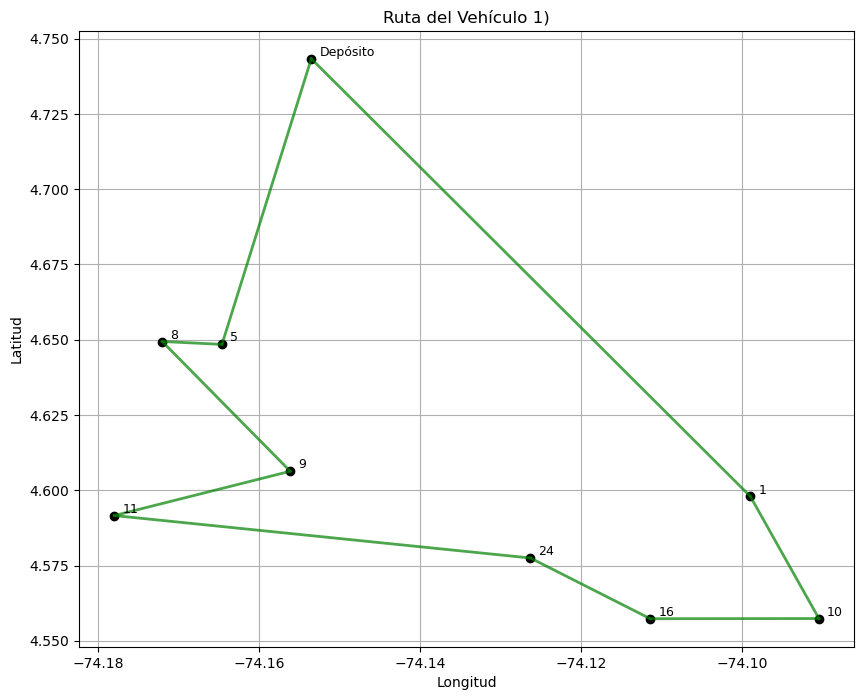

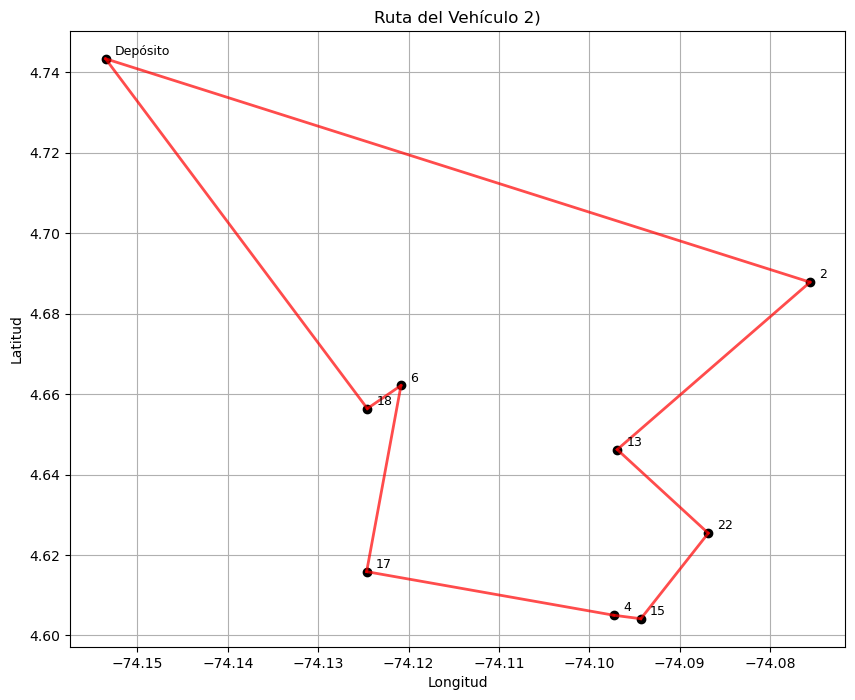

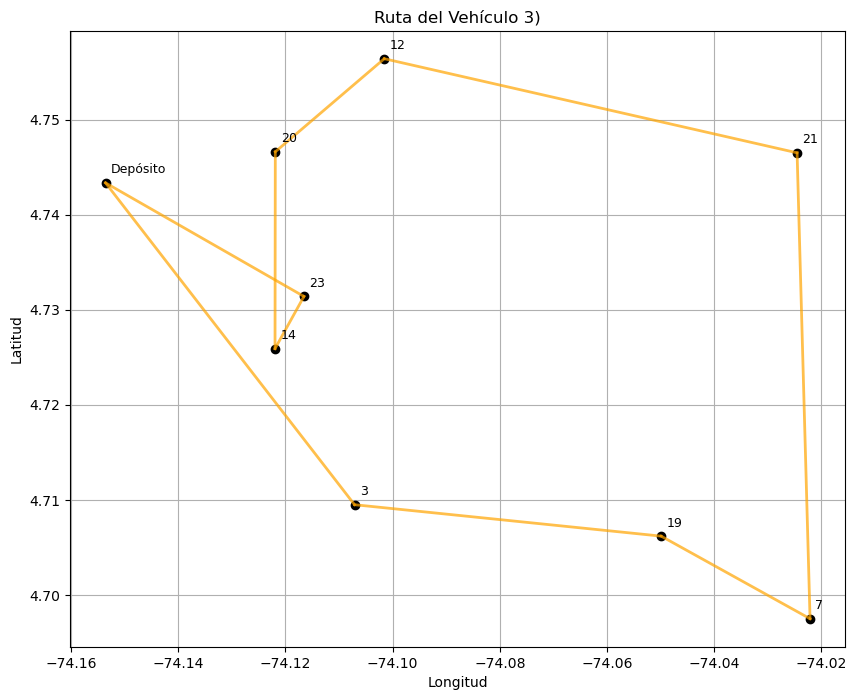

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de tener las coordenadas de los nodos
# Por ejemplo:
# coordinates = {0: (10, 10), 1: (20, 30), ..., n: (50, 60)}

colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta', 'olive', 'black']


# Nodo representativo para los depósitos (0 a 5)
depot_nodes = set(range(0))
representative_depot = 0

# Inicializar rutas
routes = {k: [] for k in model.V}

# Recorrer las rutas encontradas en el modelo
for k in model.V:
    for i in model.N:
        for j in model.N:
            if i != j and pyo.value(model.x[i, j, k]) > 0.5:
                # Reemplazar nodos del depósito por el representativo
                i_rep = representative_depot if i in depot_nodes else i
                j_rep = representative_depot if j in depot_nodes else j
                if (i_rep, j_rep) not in routes[k]:  # evitar duplicados
                    routes[k].append((i_rep, j_rep))

# Función para calcular y mostrar el costo de cada ruta
for k in model.V:
    edges = routes[k]
    if not edges:
        continue

    used_nodes_k = set()
    for i, j in edges:
        used_nodes_k.add(i)
        used_nodes_k.add(j)


    # Graficar nodos y rutas
    coords_k = {i: lat_lon_list[i] for i in used_nodes_k}
    
    # Asegurarse de que el nodo representativo tenga coordenadas (usar las del nodo 0)
    if representative_depot not in coords_k:
        coords_k[representative_depot] = lat_lon_list[representative_depot]

    plt.figure(figsize=(10, 8))

    # Dibujar nodos
    for i, (lat, lon) in coords_k.items():
        plt.plot(lon, lat, 'ko')
        label = "Depósito" if i == representative_depot else str(i)
        plt.text(lon + 0.001, lat + 0.001, label, fontsize=9)

    # Dibujar ruta del vehículo
    color = colors[k % len(colors)]
    for (i, j) in edges:
        lat1, lon1 = coords_k[i]
        lat2, lon2 = coords_k[j]
        plt.plot([lon1, lon2], [lat1, lat2], color=color, linewidth=2, alpha=0.7)

    plt.title(f"Ruta del Vehículo {k}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.grid(True)
    plt.show()
